# Libraries needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import json
import ast 

# EDA

In [2]:
df = pd.read_csv('anime_details_cleaned.csv')
df.describe()

,id,mean,rank,popularity,num_list_users,num_scoring_users,num_episodes,start_season.year,statistics.watching,statistics.completed,statistics.on_hold,statistics.dropped,statistics.plan_to_watch,statistics.num_list_users
count,10566.000000,10566.000000,10566.000000,10566.000000,1.056600e+04,1.056600e+04,10566.000000,10566.000000,1.056600e+04,1.056600e+04,10566.000000,10566.000000,10566.000000,1.056600e+04
mean,25494.610259,6.572701,6398.001893,7187.669790,7.901366e+04,4.074366e+04,10.488075,2013.196952,5.299092e+03,5.085100e+04,2061.311849,2608.304089,18196.198940,7.901591e+04
std,16473.147685,0.890315,3903.081747,5003.804157,2.245118e+05,1.357345e+05,36.219040,6.168460,2.345493e+04,1.659015e+05,7189.973498,8099.144347,40343.029252,2.245207e+05
min,5.000000,1.850000,1.000000,1.000000,1.800000e+02,1.010000e+02,0.000000,1999.000000,3.000000e+00,0.000000e+00,0.000000,2.000000,15.000000,1.800000e+02
25%,8934.250000,5.960000,2987.250000,2812.250000,1.505000e+03,4.840000e+02,1.000000,2009.000000,6.400000e+01,6.310000e+02,32.000000,70.000000,519.000000,1.506250e+03
50%,30777.500000,6.570000,6231.500000,6310.000000,8.561500e+03,3.121500e+03,3.000000,2014.000000,3.460000e+02,4.128000e+03,177.000000,193.000000,2932.000000,8.561500e+03
75%,38561.000000,7.220000,9723.750000,11240.750000,5.102250e+04,2.204950e+04,12.000000,2018.000000,2.158250e+03,2.831125e+04,1041.000000,1179.000000,14424.250000,5.102125e+04
max,54656.000000,9.170000,13810.000000,18802.000000,3.672369e+06,2.611059e+06,3057.000000,2023.000000,1.467151e+06,3.213722e+06,260194.000000,205503.000000,600304.000000,3.672501e+06


In [3]:
print(f"The number of animes: {len(df)}")

The number of animes: 10566


# Relevant variables to use

In [4]:
print("Columns:")

for header in df.columns:
    print(header)

Columns:
id
title
mean
rank
popularity
num_list_users
num_scoring_users
nsfw
media_type
status
genres
num_episodes
source
rating
studios
start_season.year
start_season.season
statistics.watching
statistics.completed
statistics.on_hold
statistics.dropped
statistics.plan_to_watch
statistics.num_list_users


# Description of Variables, what we are using
mean - Average score rated by the viewers

popularity - Relative popularity of the anime compared to other anime titles on the website

nsfw - Whether the anime is "Not Safe For Work" or not

media_type - The type of media that the anime belongs to

genres - The different categories or classifications that are assigned to the anime

source - The medium which the anime is adapted from

rating - Content rating indicting appropriate age range for the anime

studio - The animation studios that produced the anime

start_season.year - The year which the anime started airing

start_season.season - The season which the anime started airing

watch_rate - Percentage of people who are watching or finished the anime 

# 1. Genres

In [5]:
# Create another dataframe to list out all the genres
df_genres = pd.read_csv('anime_details_cleaned.csv')

# Create an empty list to store all genre names
genre_names = []

df_genres['genres'] = df_genres['genres'].str.replace("'", '"')

# Loop through each row in the 'genres' column
for genres in df_genres['genres']:
    # Check if the value in the 'genres' column is NaN or float
    if pd.isna(genres):
        # Convert NaN to an empty list
        genres_list = []
    elif isinstance(genres, float):
        # Convert float to an empty list
        genres_list = []
    else:
        # Parse the string into a list of dictionaries using the JSON module
        genres_list = json.loads(genres)
    # Loop through each dictionary in the list and append the 'name' key to the 'genre_names' list
    for genre in genres_list:
        genre_names.append(genre['name'])

# Get a set of unique genre names
unique_genres = set(genre_names)

# Loop through each unique genre name
for genre in unique_genres:
    # Create a new column with the genre name and populate it with True or False values depending on whether the genre is present in the 'genres' column for each row
    df_genres[genre] = df_genres['genres'].apply(lambda x: genre in [g['name'] for g in json.loads(x)] if isinstance(x, str) else False)

# Drop the original 'genres' column
df_genres.drop('genres', axis=1, inplace=True)

In [6]:
# Print out all unique genres and their count
for column in df_genres.columns[22:]:
    num_true = (df_genres[column] == True).sum()
    print(column, ":", num_true)

Sports : 393
Adventure : 1684
Award Winning : 146
Combat Sports : 38
Girls Love : 80
Anthropomorphic : 101
Ecchi : 670
Action : 2931
Adult Cast : 319
Shoujo : 387
Performing Arts : 83
Strategy Game : 241
Isekai : 227
Racing : 90
Crossdressing : 25
Seinen : 689
Delinquents : 13
Video Game : 113
Otaku Culture : 73
Horror : 275
Time Travel : 100
Parody : 453
Music : 1734
Boys Love : 85
Gag Humor : 158
Team Sports : 154
Harem : 339
Educational : 28
Childcare : 42
no genre : 34
Mystery : 606
Drama : 1524
Slice of Life : 1000
Military : 424
Showbiz : 23
Magical Sex Shift : 17
Romance : 1416
Visual Arts : 67
Suspense : 166
Kids : 642
CGDCT : 198
Shounen : 1285
Reincarnation : 71
Mecha : 650
Workplace : 120
Detective : 180
Iyashikei : 171
Space : 263
Reverse Harem : 66
Comedy : 3917
High Stakes Game : 34
Fantasy : 2439
Gore : 127
Supernatural : 1106
Josei : 93
Medical : 28
Mahou Shoujo : 179
Idols (Female) : 223
Gourmet : 93
School : 1435
Mythology : 373
Sci-Fi : 1614
Organized Crime : 44
Hist

# 1.1 Genre count

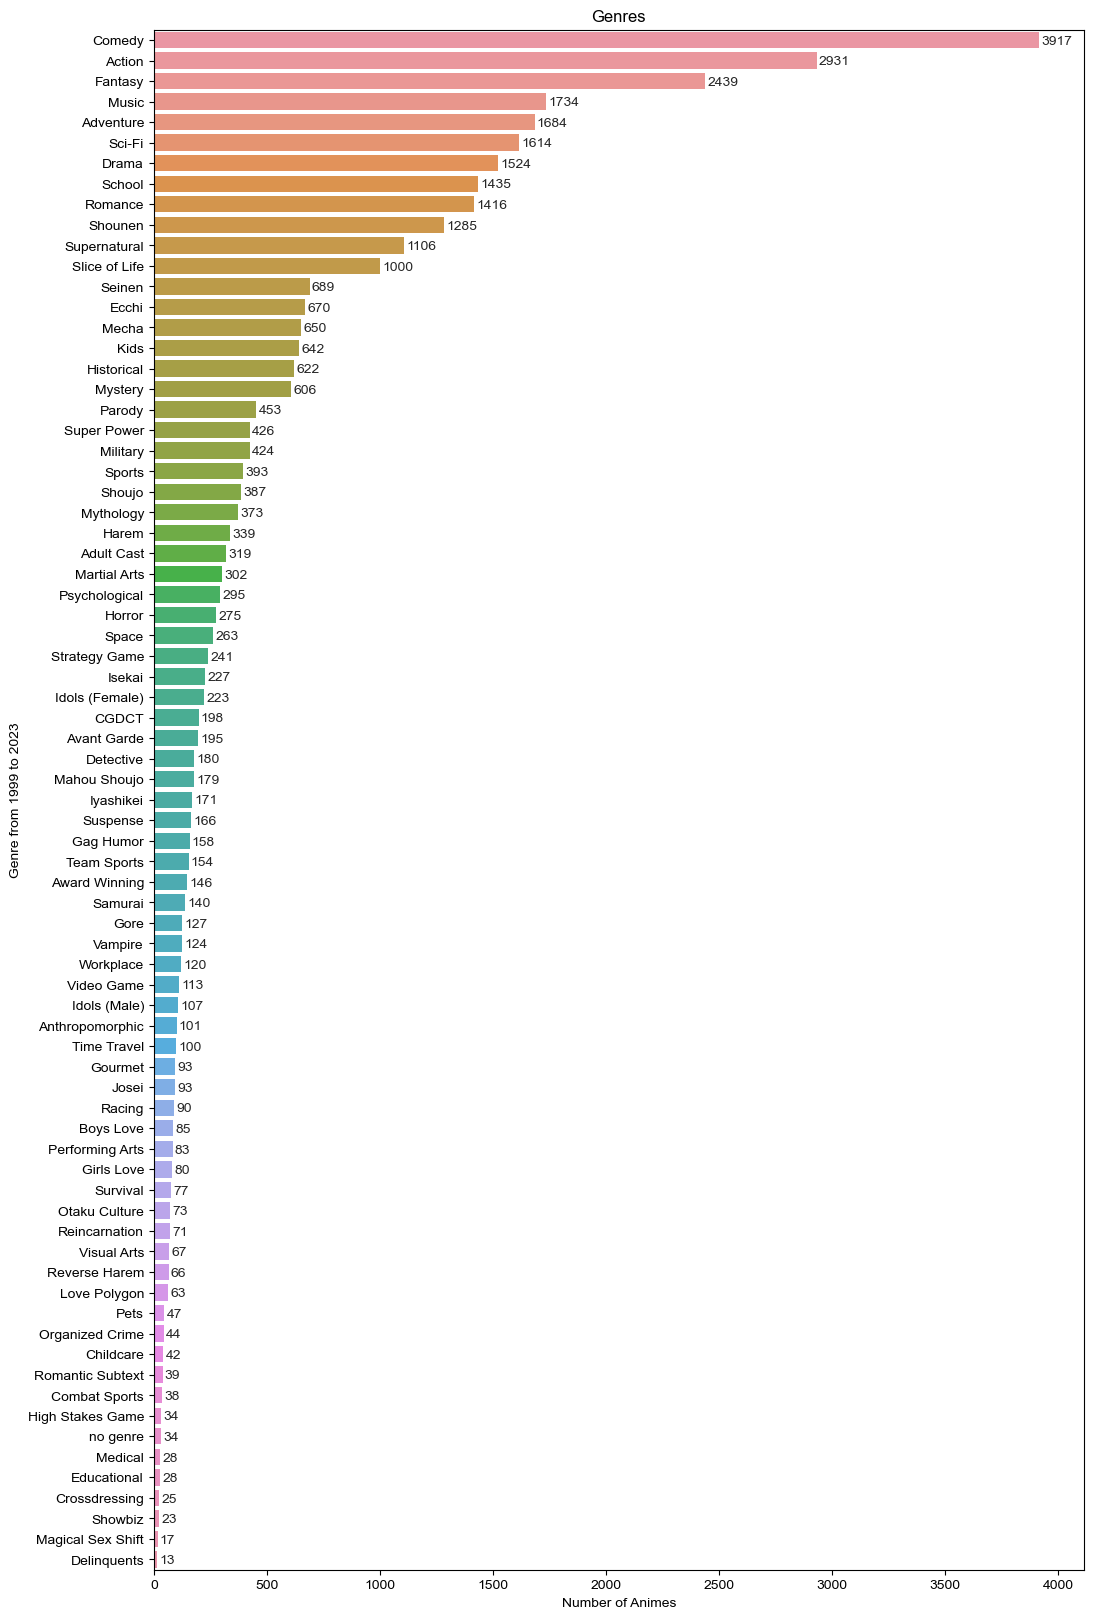

In [7]:
# Calculate the number of animes in each genre
genre_counts = df_genres.iloc[:, 22:].sum().sort_values(ascending=False)

# Sort the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Get top 10 genres by count
top_genres = genre_counts.head(10).index.tolist()

# Get bottom 10 genres by count
bottom_genres = genre_counts.tail(10).index.tolist()

# Create the bar plot with seaborn
plt.figure(figsize=(12,20)) # Set the figure size
sb.barplot(x=genre_counts.values, y=genre_counts.index)
sb.set_style("darkgrid")
plt.title('Genres')
plt.xlabel('Number of Animes')
plt.ylabel('Genre from 1999 to 2023')

# Loop through each bar and its respective count
for i, count in enumerate(genre_counts):
    plt.text(count + 10, i + 0.2, str(count))

plt.show()

# Analysis
* **Comedy** genre has the highest number of animes produced. Followed by **Action, Fantasy, Adventure and Sci-Fi.**
* **Delinquents** has the lowest number of animes produced. Followed by **Showbiz, Magical Sex Shift, Crossdressing, Medical, Educational.**

# 1.2 Genre trend

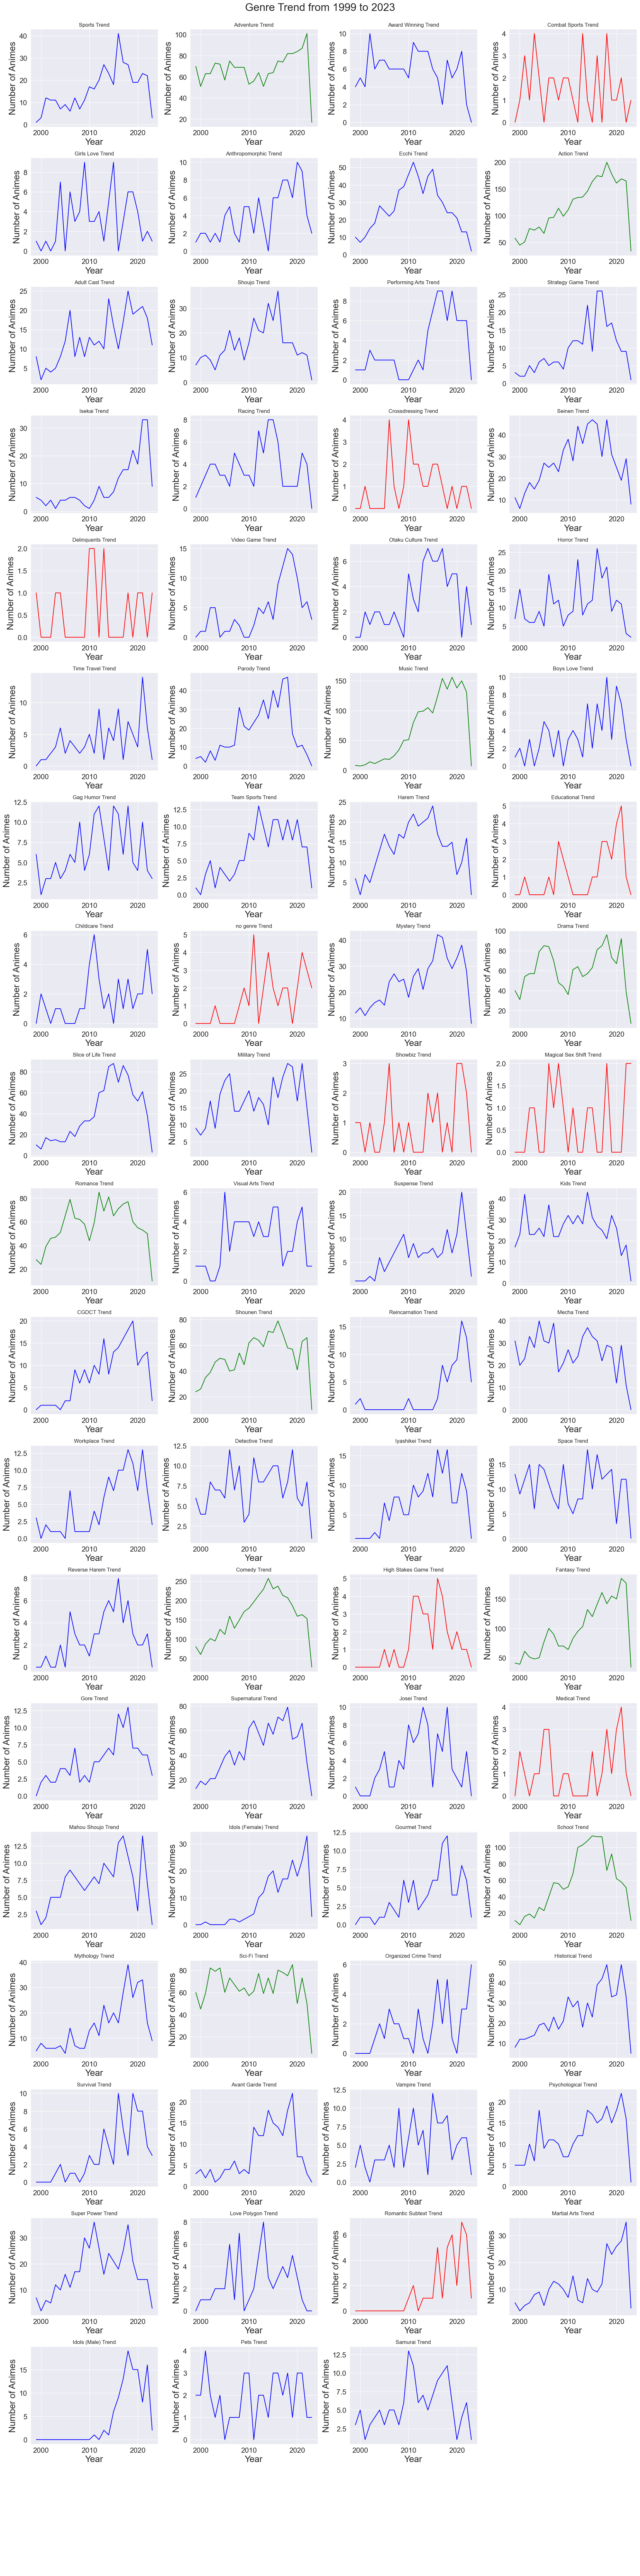

In [8]:
# Drop unnecessary columns from the df_genres dataframe
df_genreTrend = df_genres.drop(['id', 'mean', 'rank', 'popularity', 'num_list_users', 'num_scoring_users', 'num_episodes', 'statistics.plan_to_watch', 'statistics.num_list_users', 'statistics.watching', 'statistics.completed', 'statistics.on_hold', 'statistics.dropped'], axis=1)

# Create a list of genre names
genre_names = df_genreTrend.columns[9:]

# Create the subplot grid
fig, axes = plt.subplots(nrows=20, ncols=4, figsize=(20, 80), dpi=100)
fig.suptitle('Genre Trend from 1999 to 2023', fontsize=24, y=1)

# Flatten the axes array so we can iterate over it more easily
axes = axes.flatten()

# Iterate over the genre names and plot each one on a separate subplot
for i, genre in enumerate(genre_names):
    genre_df = df_genreTrend[['start_season.year', genre]].groupby('start_season.year').sum().reset_index()
    # Change the colors of top 10 and bottom 10 genres to green and red respectively
    color = 'green' if genre in top_genres else 'red' if genre in bottom_genres else 'blue'
    sb.set_style("darkgrid")
    sb.lineplot(x='start_season.year', y=genre, data=genre_df, ax=axes[i], color=color)
    axes[i].set_title(genre + ' Trend')
    axes[i].set_xlabel('Year', fontsize=20)
    axes[i].set_ylabel('Number of Animes', fontsize=20)

# Hide any unused subplots
for ax in axes[len(genre_names):]:
    ax.axis('off')
    
for ax in axes:
    ax.tick_params(axis='both', labelsize=16)

plt.tight_layout()
plt.show()


# Analysis

* Action, adventure, fantasy, comedy, isekai(reincarnation), slice of life, and music have shown an increasing trend in the number of anime produced between 1999 - 2023. 


* And the genres stated above have considerably large amounts of anime produced compared to less popular genres like the Delinquent genre.


* However, do note that most of the genres above show an abrupt decrease. This is because the year 2023 only just started. Thus, not many new animes from each genre have been produced.



# 1.3.1 Genres VS Average Mean

In [9]:
for col in df_genres.columns[22:]:
    total_mean = 0
    # Check if column value is True
    if df_genres[col].any():
        # If True, calculate the mean and add it to the total
        mean_score = df_genres.loc[df_genres[col], 'mean'].mean()
        total_mean += mean_score
    print(f"{col}: {total_mean:.2f}")

Sports: 6.86
Adventure: 6.82
Award Winning: 7.58
Combat Sports: 6.93
Girls Love: 6.80
Anthropomorphic: 6.93
Ecchi: 6.52
Action: 6.82
Adult Cast: 7.38
Shoujo: 6.90
Performing Arts: 6.91
Strategy Game: 6.34
Isekai: 7.06
Racing: 6.56
Crossdressing: 6.61
Seinen: 7.05
Delinquents: 7.72
Video Game: 6.64
Otaku Culture: 7.21
Horror: 6.33
Time Travel: 7.18
Parody: 6.42
Music: 6.16
Boys Love: 6.82
Gag Humor: 7.42
Team Sports: 7.10
Harem: 6.78
Educational: 6.54
Childcare: 7.57
no genre: 6.00
Mystery: 7.10
Drama: 7.03
Slice of Life: 6.57
Military: 6.97
Showbiz: 7.26
Magical Sex Shift: 6.74
Romance: 6.93
Visual Arts: 7.03
Suspense: 7.07
Kids: 6.18
CGDCT: 7.13
Shounen: 7.20
Reincarnation: 7.32
Mecha: 6.63
Workplace: 7.01
Detective: 6.96
Iyashikei: 7.54
Space: 6.67
Reverse Harem: 6.64
Comedy: 6.63
High Stakes Game: 7.09
Fantasy: 6.72
Gore: 7.23
Supernatural: 6.94
Josei: 7.01
Medical: 7.00
Mahou Shoujo: 6.92
Idols (Female): 6.68
Gourmet: 6.69
School: 6.94
Mythology: 7.03
Sci-Fi: 6.70
Organized Crime: 

# Analysis

* Deliquents Genre have to highes mean rating

# 1.3.2 Genres VS Mean boxplot

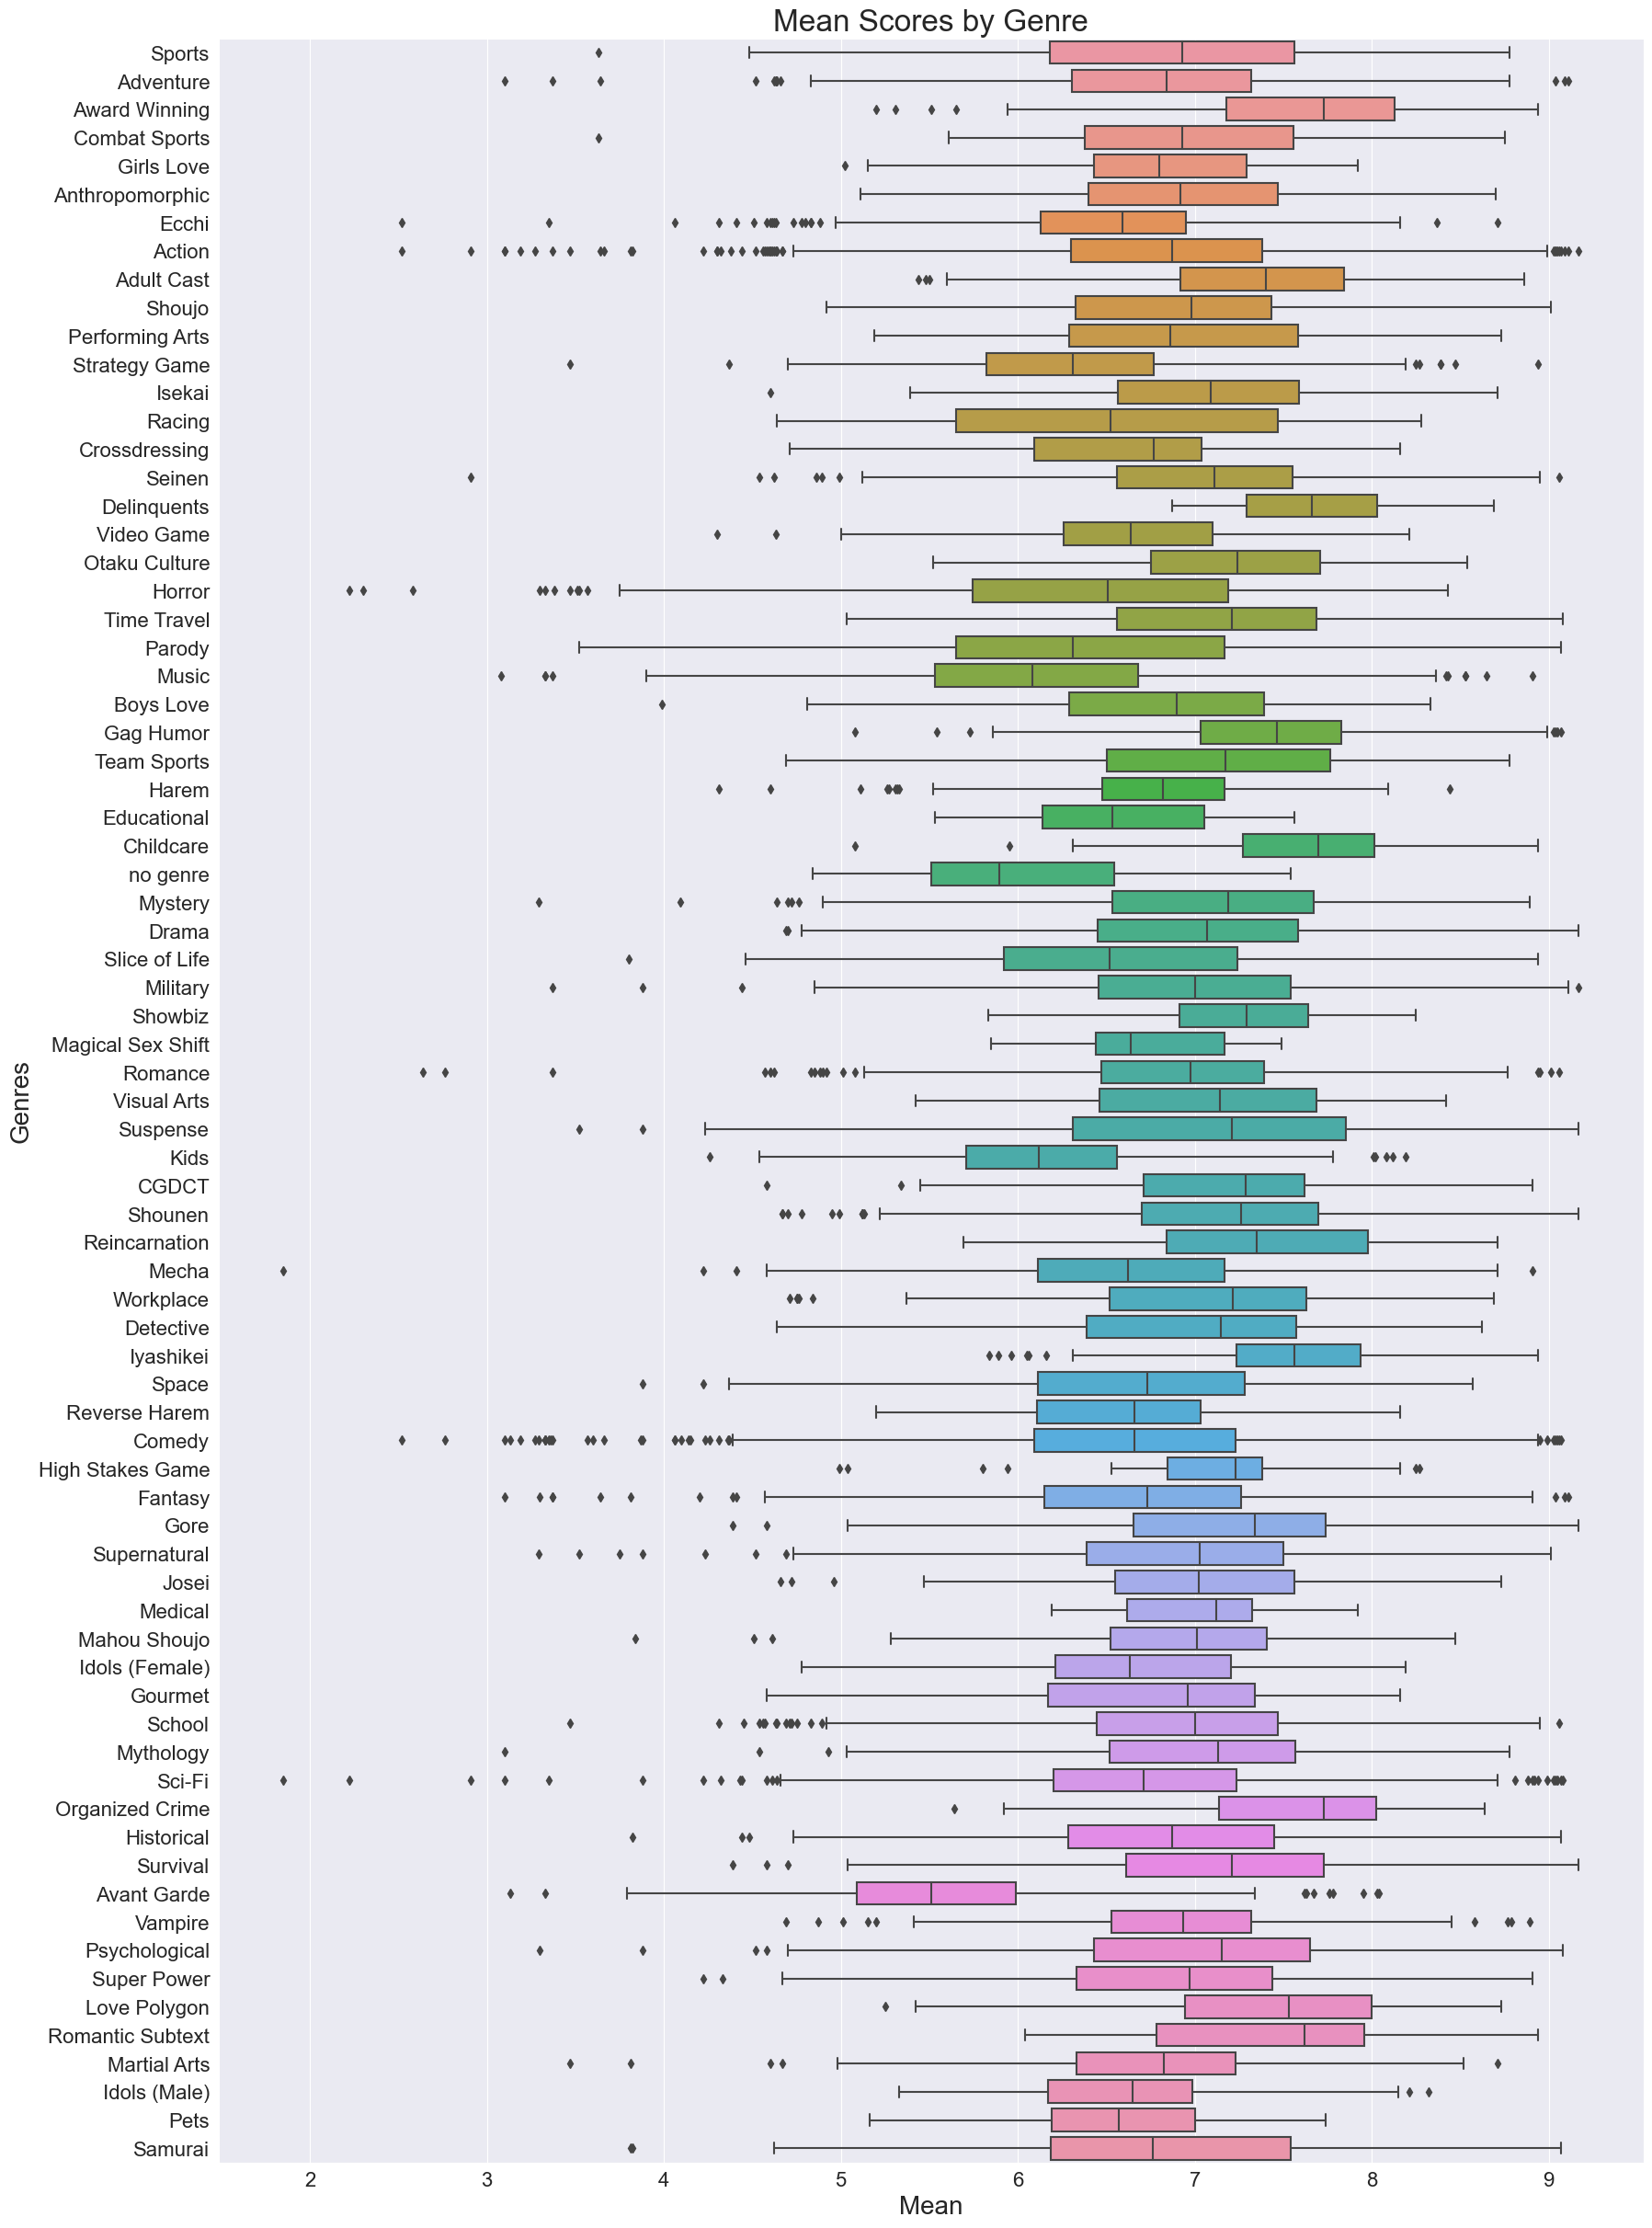

In [10]:
# Create an empty list to store the mean values
means = []

# Create an empty list to store the filtered data
filtered_data_list = []

# Loop through each column starting from column 22
for col in df_genres.columns[22:]:

    # Check if the value of the column is True for each row
    filtered_data = df_genres[df_genres[col] == True]

    # Get the mean of the filtered data
    mean = filtered_data['mean'].mean()

    # Append the mean to the list
    means.append(mean)
    
    # Append the filtered data to the list
    filtered_data_list.append(filtered_data['mean'])

# Plot all the boxplots in one graph
plt.figure(figsize=(20,30))
sb.set_style("darkgrid")
ax = sb.boxplot(data=filtered_data_list, orient="h")
ax.set_yticklabels(df_genres.columns[22:], fontsize=16)  # Increase font size for genre names
ax.tick_params(axis='x', labelsize=16)  # Increase font size for mean values
plt.title('Mean Scores by Genre', fontsize=24)
plt.ylabel('Genres', fontsize=20)
plt.xlabel('Mean', fontsize=20)

plt.show()


# Analysis
* From the boxplot, looking at the mean score, action, childcare and organised crime have higher average mean.

In [11]:
# Calculate correlation between mean and each genre
correlations = df_genres[df_genres.columns[22:]].corrwith(df_genres['mean'])
correlations = correlations.sort_values()

# Iterate over genre names and their corresponding correlation values
for genre, correlation in zip(df_genres.columns[22:], correlations):
    print(f"{genre}: {correlation}")

Sports: -0.20723176706039803
Adventure: -0.14905162497447844
Award Winning: -0.1134962194469422
Combat Sports: -0.044557542997230665
Girls Love: -0.039428072868435804
Anthropomorphic: -0.03668490944355241
Ecchi: -0.03636243192231978
Action: -0.014046308692732289
Adult Cast: -0.002162207785528912
Shoujo: -0.0016346735325342158
Performing Arts: -0.0011879764704422026
Strategy Game: 0.0023029083253270606
Isekai: 0.002411312027990106
Racing: 0.003231818053901473
Crossdressing: 0.005628934125719258
Seinen: 0.007464203415553883
Delinquents: 0.007673623859115701
Video Game: 0.012552437281097053
Otaku Culture: 0.015748245629478783
Horror: 0.0176009201843704
Time Travel: 0.018055130447023632
Parody: 0.022165584498856437
Music: 0.024271510066078278
Boys Love: 0.024575082372121703
Gag Humor: 0.025515209576664626
Team Sports: 0.03303310556829147
Harem: 0.034193956773128927
Educational: 0.03596699091951217
Childcare: 0.03869693001034328
no genre: 0.03927458341400299
Mystery: 0.04075244287620331
Dra

# Analysis

* Medical genre has the highest postiive correlation with mean.
* Whereas Sci-Fi has the highest negative correlation with mean.
* Martial arts have the lowest magnitude for correlation with mean

# 2. Studios

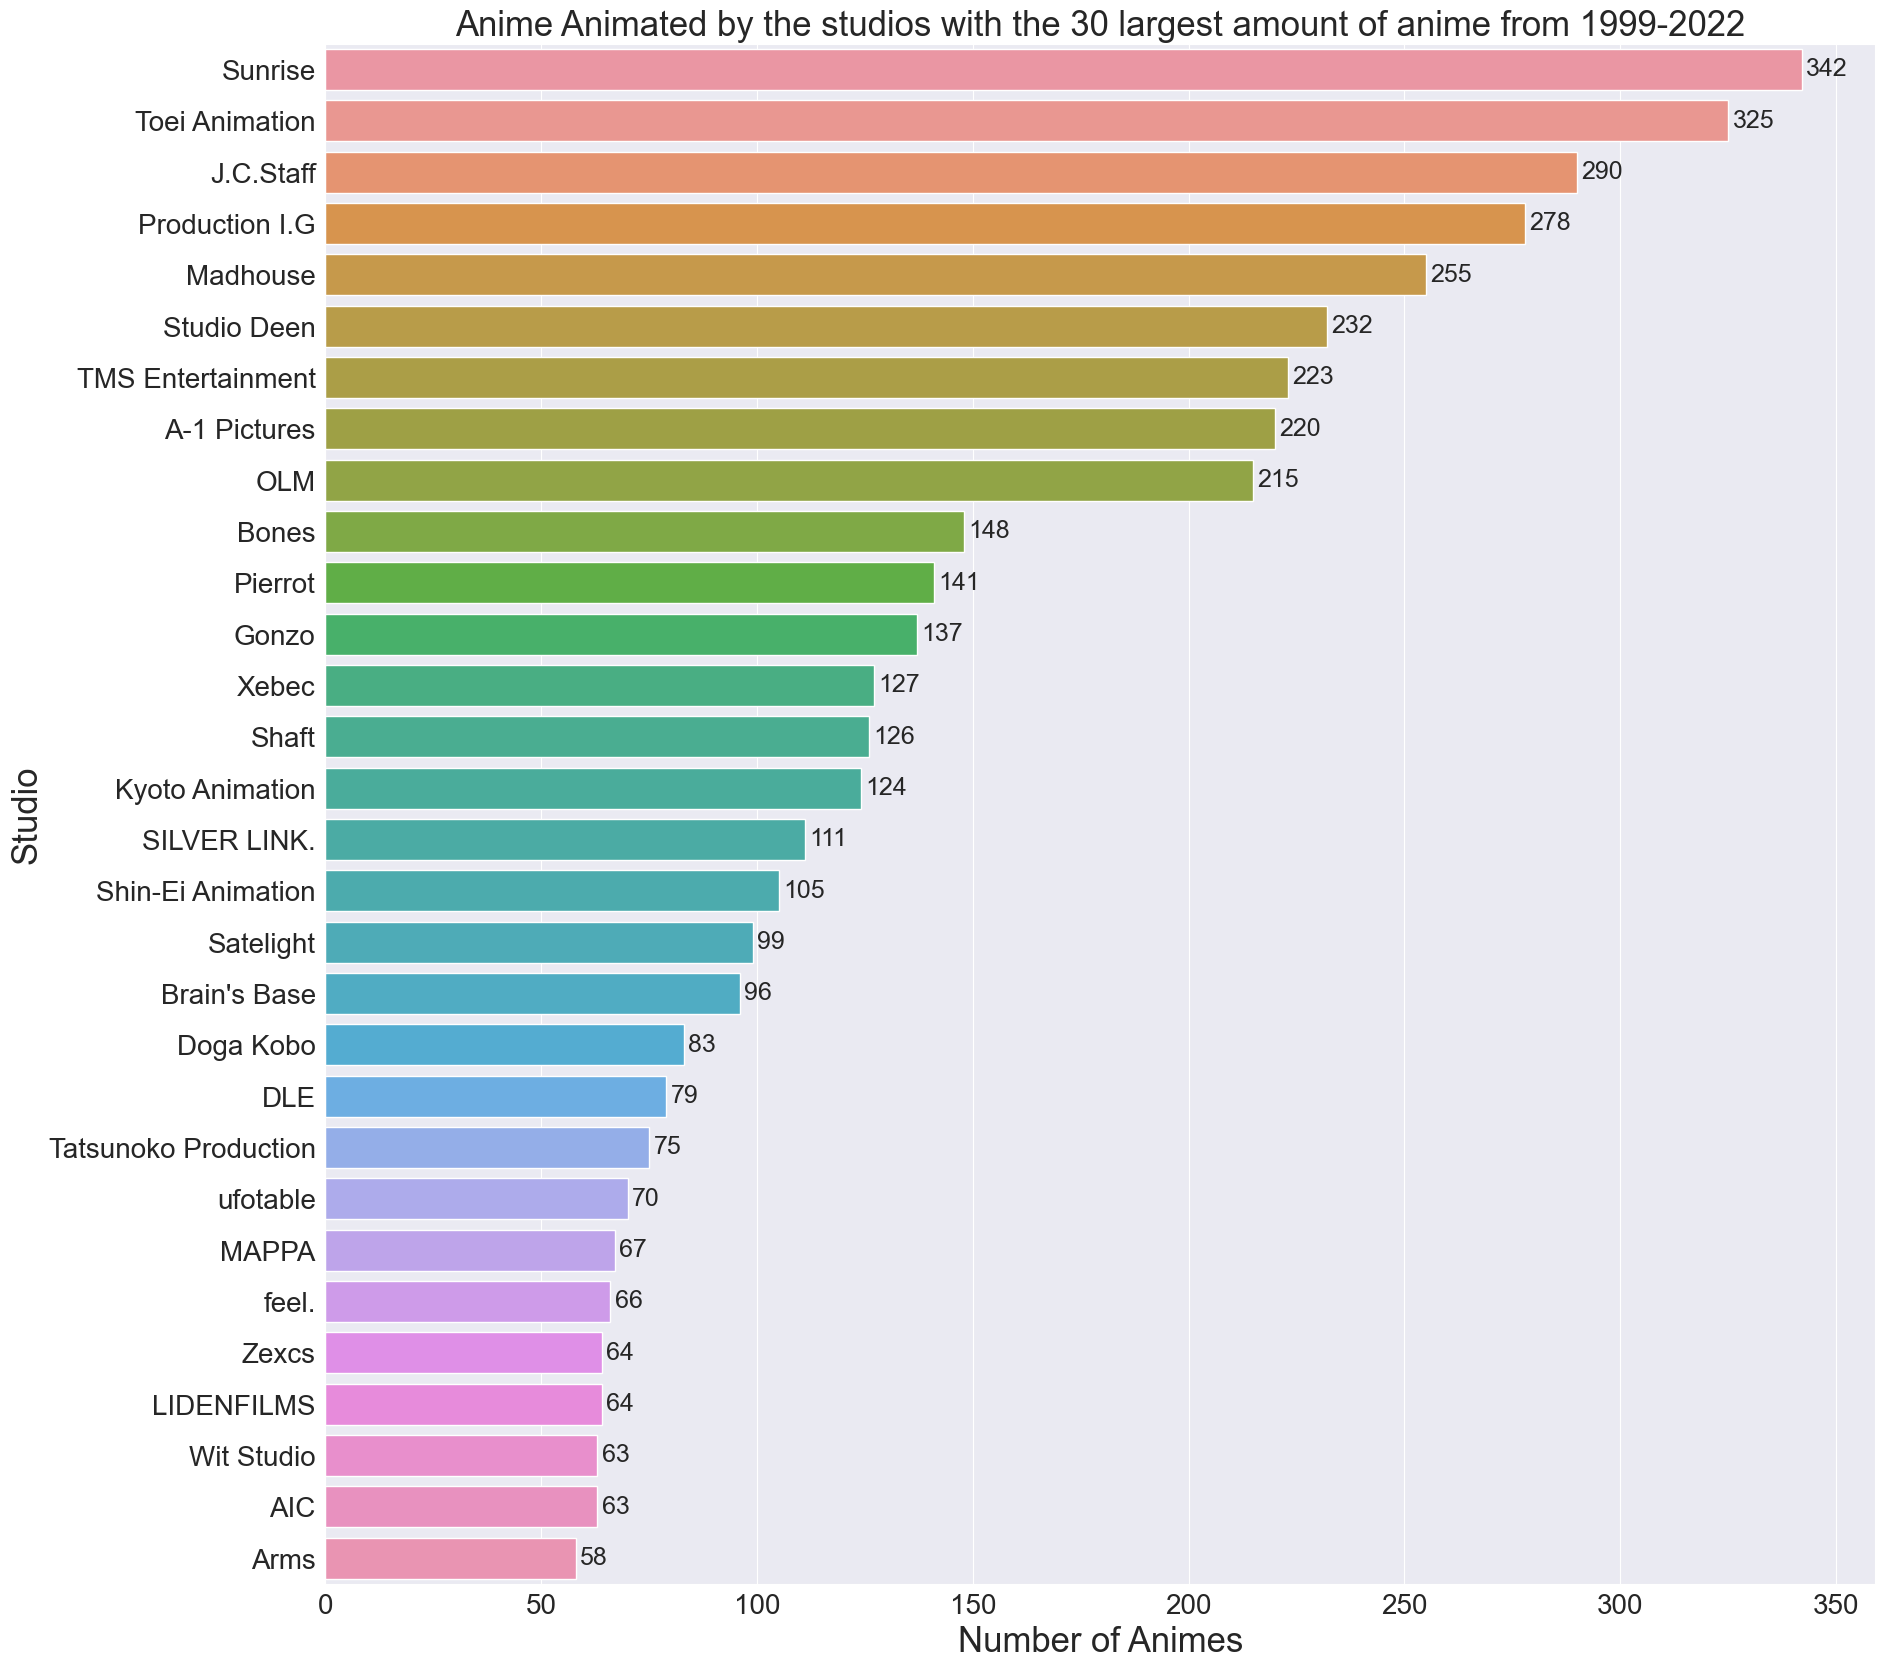

In [12]:
df_studios = pd.read_csv('anime_details_cleaned.csv')
df_studios = df_studios.sort_values('start_season.year', ascending=False)
df_dropped_studios = df_studios.drop(['start_season.year', 'start_season.season', 'statistics.num_list_users', 'statistics.plan_to_watch', 'statistics.watching', 'statistics.completed', 'statistics.on_hold', 'statistics.dropped', 'source', 'status'], axis=1)

df_dropped_studios['studio_name'] = df_dropped_studios['studios'].astype('str')
df_dropped_studios['studio_name'] = df_dropped_studios['studio_name'].apply(lambda x: ast.literal_eval(x))

def studio_name(row):
    name = row['studio_name'][0]['name']
    return name

df_dropped_studios['studio_only'] = df_dropped_studios.apply(studio_name, axis=1)

df_studio_num = df_dropped_studios['studio_only'].value_counts()
df_studio_num = pd.DataFrame(data=df_studio_num)
df_studio_num = df_studio_num.drop(['no studio'], axis=0)
df_studio_num = df_studio_num.nlargest(30, columns=['studio_only'], keep='first')
df_studio_num = df_studio_num.reset_index()

plt.figure(figsize=(20, 20))
sb.barplot(x='studio_only', y="index", data=df_studio_num, estimator=sum, ci=None)
sb.set_style("darkgrid")

for i, v in enumerate(df_studio_num['studio_only']):
    plt.annotate(str(v), xy=(v + 1 , i), va='center', fontsize=18)

plt.title('Anime Animated by the studios with the 30 largest amount of anime from 1999-2022', fontsize=25)
plt.ylabel('Studio', fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Number of Animes', fontsize=25)
plt.xticks(fontsize=20)
plt.show()


In [13]:
# A list for the top 30 studio
top_30list = []
for studio in df_studio_num['index']:
    top_30list.append(studio)

# Analysis
* Sunrise has made the most anime from 1999 to 2023, followed by Toei Animation

# Proportion of top rated 100 animes produced by studios

In [14]:
df_studios_proportion = df_dropped_studios[df_dropped_studios['studio_only'] != 'no studio'] # filter 

df_studios_proportion = df_studios_proportion.sort_values(['mean'], ascending=False).reset_index(drop=True)

df_top_100 = df_studios_proportion[:100]

prop_dict = {}
for studio in df_top_100['studio_only']:
    prop_dict[studio]=0
    
    
for studio in df_top_100['studio_only']:
    prop_dict[studio]+=1

prop_dict = dict(sorted(prop_dict.items(), key=lambda x:x[1],reverse = True))

for k,v in prop_dict.items():
    print(f"{k}: {v}", "%")
    
lst_top_100anime = []

for k,v in prop_dict.items():
    lst_top_100anime.append(k)

Madhouse: 7 %
MAPPA: 6 %
Sunrise: 6 %
Bandai Namco Pictures: 5 %
A-1 Pictures: 5 %
Wit Studio: 5 %
Kyoto Animation: 5 %
Shaft: 5 %
Artland: 5 %
Bones: 4 %
Pierrot: 4 %
ufotable: 4 %
Production I.G: 3 %
Studio Deen: 3 %
Kinema Citrus: 3 %
Brain's Base: 3 %
TMS Entertainment: 2 %
CloverWorks: 2 %
CoMix Wave Films: 2 %
Studio Ghibli: 2 %
David Production: 2 %
Gainax: 2 %
Shuka: 2 %
White Fox: 1 %
Studio LAN: 1 %
Studio Bind: 1 %
OLM: 1 %
Toei Animation: 1 %
Tatsunoko Production: 1 %
Khara: 1 %
B.CMAY PICTURES: 1 %
Trigger: 1 %
Studio Chizu: 1 %
Studio VOLN: 1 %
Shin-Ei Animation: 1 %
J.C.Staff: 1 %


# Analysis
* For the first top 100 highly rated animes. MadHouse has the highest proportion of anime produced.
* Some of the few highly rated shows from the top 100 animes are Death Note, One Punch Man, HunterXHunter and many more

# Analysis on the number of completed and dropped with mean 1999 - 2022
### - The top 100 highly rated anime produced by a studio 
### - The top 30 number of anime produced by a studio

In [15]:
df_complete_or_drop = pd.read_csv('anime_details_cleaned.csv')
df_complete_or_drop = df_complete_or_drop[['studios','title','mean','statistics.watching','statistics.completed','statistics.on_hold','statistics.dropped','statistics.plan_to_watch']]

df_complete_or_drop['studio_name'] = df_complete_or_drop['studios'].astype('str')

df_complete_or_drop['studio_name'] = df_complete_or_drop['studios'].apply(lambda x: ast.literal_eval(str(x)))

def studio_name(row):
    print(row['studio_name'][0]['name'])
    name = row['studio_name'][0]['name']
    return name

df_complete_or_drop['studio_only'] = df_complete_or_drop['studio_name'].apply(lambda x:
                                                x[0].get('name', '')
                                                if len(x) > 0 else 'no studio')


df_complete_or_drop=df_complete_or_drop.drop(['studios','studio_name'],axis=1)

df_complete_or_drop = df_complete_or_drop.dropna()
df_complete_or_drop_no_studios = df_complete_or_drop[df_complete_or_drop['studio_only'] != 'no studio'] # filter 
df_groupby = df_complete_or_drop_no_studios.groupby('studio_only').sum()
df_groupby = df_groupby.reset_index()



df_groupby_mean_rating = df_complete_or_drop_no_studios.groupby('studio_only').mean()

df_groupby_mean_rating_30 = df_complete_or_drop_no_studios.groupby('studio_only').mean()
# For merging top 100
df_groupby_mean_rating_col_100 = df_groupby_mean_rating[['mean']]
df_groupby_mean_rating_col_100=df_groupby_mean_rating_col_100.reset_index()
df_groupby_mean_rating_col_100 =df_groupby_mean_rating_col_100[df_groupby_mean_rating_col_100['studio_only'].isin(lst_top_100anime)]

# For merging 30
df_groupby_mean_rating_col_30 = df_groupby_mean_rating_30[['mean']]
df_groupby_mean_rating_col_30=df_groupby_mean_rating_col_30.reset_index()
df_groupby_mean_rating_col_30 =df_groupby_mean_rating_col_30[df_groupby_mean_rating_col_30['studio_only'].isin(top_30list)]

# Studios produced the top 100 highly rated anime

In [16]:
df_groupby_top = df_groupby[df_groupby['studio_only'].isin(lst_top_100anime)]


top_dict = {}

for i in range(len(df_groupby_top)):
    completed = df_groupby_top.iloc[i]['statistics.completed']
    studi = df_groupby_top.iloc[i]['studio_only']
    dropped = df_groupby_top.iloc[i]['statistics.dropped']
    top_dict[studi] = dropped/completed
    

top_dict = dict(sorted(top_dict.items(), key=lambda x:x[1],reverse = True))

for k,v in top_dict.items():
    print(f"{k}: {v*100:.2f} %")

Tatsunoko Production: 7.79 %
Artland: 7.58 %
Shin-Ei Animation: 7.42 %
Pierrot: 7.18 %
Toei Animation: 6.73 %
B.CMAY PICTURES: 6.33 %
Studio Deen: 5.71 %
Trigger: 5.70 %
Studio LAN: 5.59 %
CloverWorks: 5.41 %
Brain's Base: 5.27 %
Gainax: 5.21 %
Sunrise: 5.07 %
TMS Entertainment: 5.04 %
MAPPA: 4.78 %
J.C.Staff: 4.71 %
Kinema Citrus: 4.66 %
OLM: 4.57 %
Bandai Namco Pictures: 4.37 %
David Production: 4.19 %
Madhouse: 4.16 %
A-1 Pictures: 4.13 %
Shaft: 3.88 %
Production I.G: 3.47 %
White Fox: 3.42 %
Kyoto Animation: 3.33 %
Shuka: 3.20 %
Studio VOLN: 3.03 %
Bones: 2.98 %
Wit Studio: 2.01 %
ufotable: 1.71 %
Studio Bind: 1.63 %
Khara: 0.46 %
CoMix Wave Films: 0.44 %
Studio Chizu: 0.41 %
Studio Ghibli: 0.33 %


<AxesSubplot:xlabel='dropout_rate', ylabel='mean_y'>

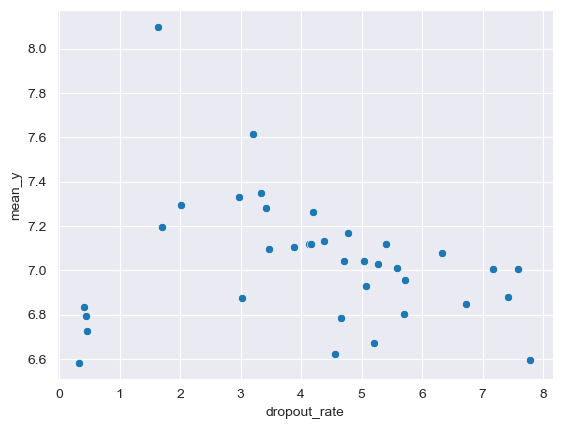

In [17]:
inner_merged_total = pd.merge(df_groupby_top, df_groupby_mean_rating_col_100, on=["studio_only"])
inner_merged_total['dropout_rate'] = (inner_merged_total['statistics.dropped']/inner_merged_total['statistics.completed'])*100
sb.scatterplot(data=inner_merged_total, x="dropout_rate", y="mean_y")

In [18]:
inner_merged_total.corr()

,mean_x,statistics.watching,statistics.completed,statistics.on_hold,statistics.dropped,statistics.plan_to_watch,mean_y,dropout_rate
mean_x,1.000000,0.666086,0.656752,0.755502,0.729370,0.723195,-0.090525,0.270819
statistics.watching,0.666086,1.000000,0.908804,0.933709,0.921579,0.862281,0.215490,0.150066
statistics.completed,0.656752,0.908804,1.000000,0.950761,0.925923,0.968727,0.220721,-0.026276
statistics.on_hold,0.755502,0.933709,0.950761,1.000000,0.973149,0.949830,0.172415,0.167905
statistics.dropped,0.729370,0.921579,0.925923,0.973149,1.000000,0.911287,0.128072,0.223798
statistics.plan_to_watch,0.723195,0.862281,0.968727,0.949830,0.911287,1.000000,0.198983,0.031347
mean_y,-0.090525,0.215490,0.220721,0.172415,0.128072,0.198983,1.000000,-0.194258
dropout_rate,0.270819,0.150066,-0.026276,0.167905,0.223798,0.031347,-0.194258,1.000000


# Analysis
* The studio who has produced some the 100 highly rated - Tatsunoko Production has one of the highest dropped rates with 7.79%
* Some of the animes they have produced are Neo Genesis Evangelion and Psycho-Pass 2
* The studio with the least dropped rate is Studio Ghibli with 0.33%
* From the scatter plot, it seems there is an inverse relationship with mean ratings and drop out rate
* Higher the drop out rate the lower the mean rating
* Looking at Mean_y against droup out rate there is a low negatvie correlation of 0.19425

# Top 30 studios with most anime produced

In [19]:
df_groupby_30 = df_groupby[df_groupby['studio_only'].isin(top_30list)]
df_groupby_30=df_groupby_30.reset_index()
top_30_dict = {}

for i in range(len(df_groupby_30)):
    completed = df_groupby_30.iloc[i]['statistics.completed']
    studi = df_groupby_30.iloc[i]['studio_only']
    dropped = df_groupby_30.iloc[i]['statistics.dropped']
    top_30_dict[studi] = dropped/completed
    
    

top_30_dict = dict(sorted(top_30_dict.items(), key=lambda x:x[1],reverse = True))

for k,v in top_30_dict.items():
    print(f"{k}: {v*100:.2f} %")


DLE: 14.36 %
Satelight: 10.73 %
LIDENFILMS: 8.86 %
Gonzo: 7.99 %
Doga Kobo: 7.86 %
Tatsunoko Production: 7.79 %
Zexcs: 7.77 %
Shin-Ei Animation: 7.42 %
Pierrot: 7.18 %
Xebec: 6.77 %
Toei Animation: 6.73 %
SILVER LINK.: 6.44 %
Arms: 6.20 %
feel.: 6.04 %
AIC: 5.73 %
Studio Deen: 5.71 %
Brain's Base: 5.27 %
Sunrise: 5.07 %
TMS Entertainment: 5.04 %
MAPPA: 4.78 %
J.C.Staff: 4.71 %
OLM: 4.57 %
Madhouse: 4.16 %
A-1 Pictures: 4.13 %
Shaft: 3.88 %
Production I.G: 3.47 %
Kyoto Animation: 3.33 %
Bones: 2.98 %
Wit Studio: 2.01 %
ufotable: 1.71 %


<AxesSubplot:xlabel='dropout_rate', ylabel='mean_y'>

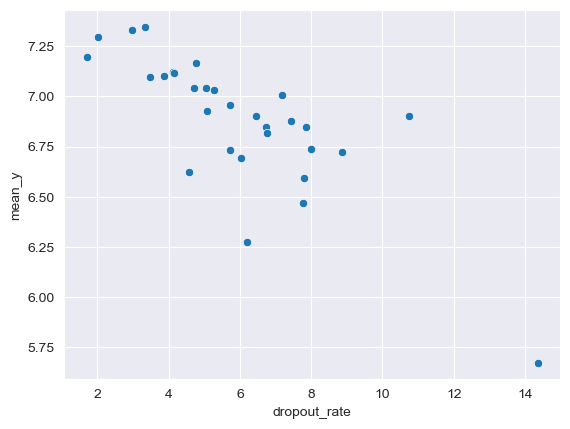

In [20]:
inner_merged_total_30 = pd.merge(df_groupby_30, df_groupby_mean_rating_col_30, on=["studio_only"])
inner_merged_total_30['dropout_rate'] = (inner_merged_total_30['statistics.dropped']/inner_merged_total_30['statistics.completed'])*100
sb.scatterplot(data=inner_merged_total_30, x="dropout_rate", y="mean_y")

In [21]:
#correlation
inner_merged_total_30.corr()

,index,mean_x,statistics.watching,statistics.completed,statistics.on_hold,statistics.dropped,statistics.plan_to_watch,mean_y,dropout_rate
index,1.000000,0.090853,-0.193129,-0.248191,-0.227001,-0.247425,-0.266302,0.127177,-0.114227
mean_x,0.090853,1.000000,0.530963,0.547255,0.659666,0.598370,0.613491,0.312726,-0.302231
statistics.watching,-0.193129,0.530963,1.000000,0.890956,0.910458,0.878881,0.825858,0.621310,-0.461317
statistics.completed,-0.248191,0.547255,0.890956,1.000000,0.941984,0.890475,0.961251,0.639103,-0.574485
statistics.on_hold,-0.227001,0.659666,0.910458,0.941984,1.000000,0.954350,0.935999,0.597444,-0.437614
statistics.dropped,-0.247425,0.598370,0.878881,0.890475,0.954350,1.000000,0.875501,0.513337,-0.311758
statistics.plan_to_watch,-0.266302,0.613491,0.825858,0.961251,0.935999,0.875501,1.000000,0.635643,-0.551315
mean_y,0.127177,0.312726,0.621310,0.639103,0.597444,0.513337,0.635643,1.000000,-0.786698
dropout_rate,-0.114227,-0.302231,-0.461317,-0.574485,-0.437614,-0.311758,-0.551315,-0.786698,1.000000


# Analysis
* DLE has a very high dropped rate of 14.36%.
* ufotable has the least dropped rate of 1.71%
* From the scatter plot the seems to be negative correlation with the mean_rating and dropout rate
* Higher the dropout rate lower the mean ratings
* Looking at Mean_y against droup out rate there is a high negatvie correlation of 0.7867

# Difference between top 30 (Quantity) and top 100 (Quality)
* For studios relating to quantity, the drop rate is higher compared to studios relating to quality
* For studios relating to quantity, there seem to be a stronger negative correlation with the drop our rate and the mean rating compared to the studios relating to quality, where it has weaker negative correlation

# Studio compared with mean ratings using box plot

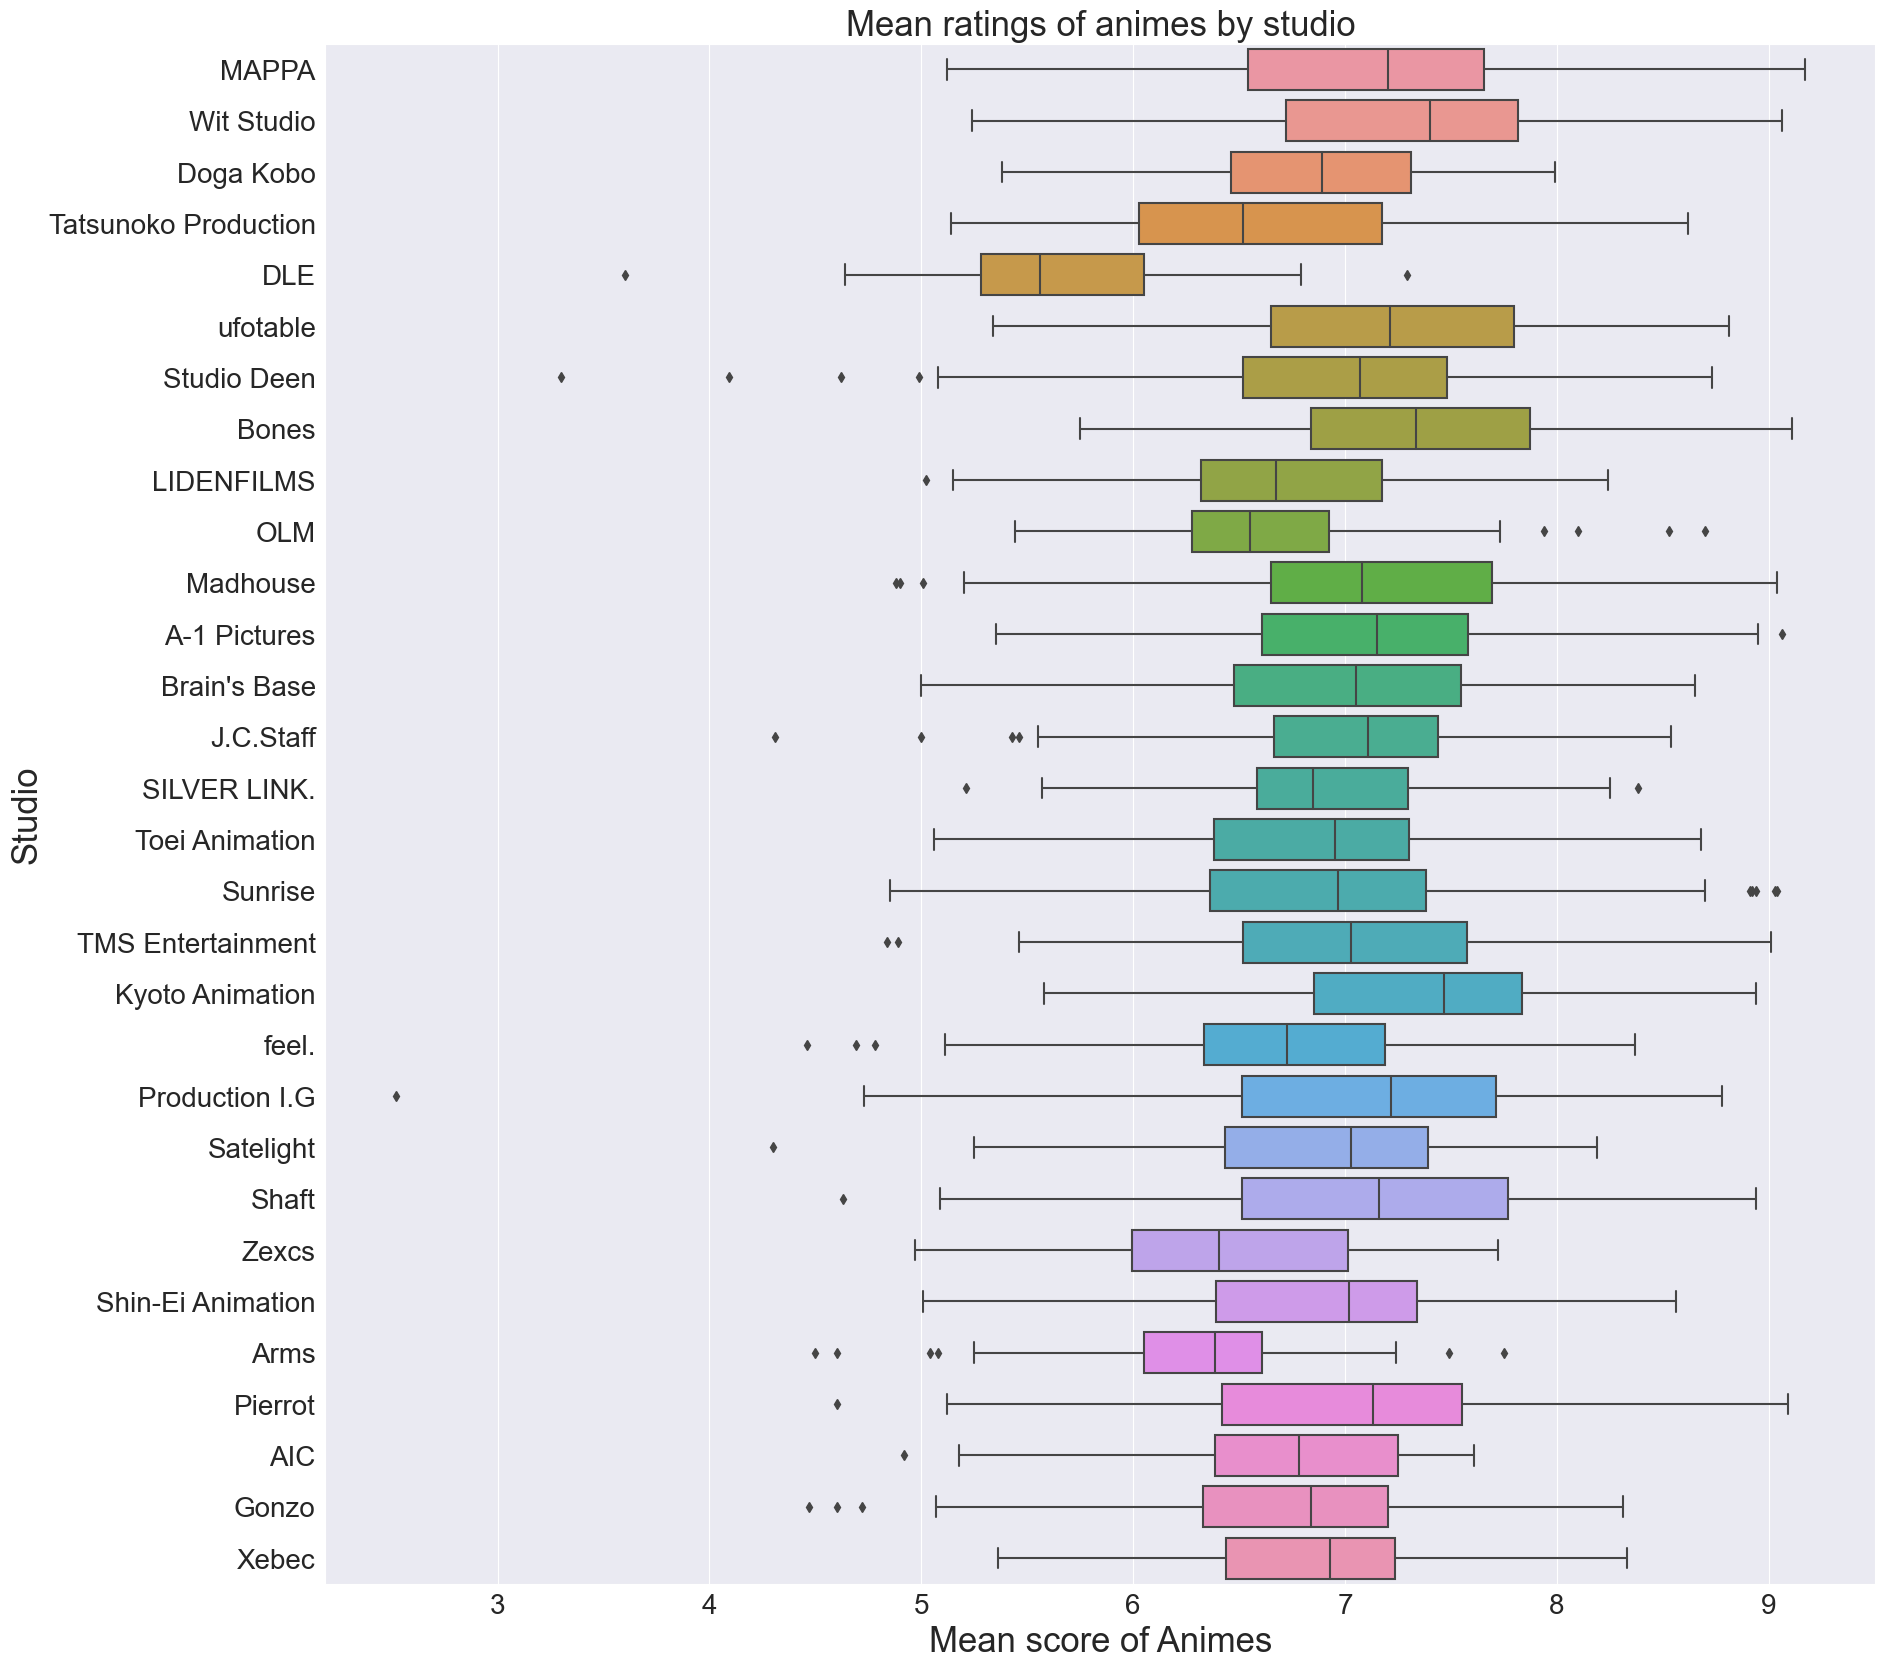

In [22]:
df_dropped_studios_mean = df_dropped_studios.groupby('studio_only').mean()
df_dropped_studios_mean= df_dropped_studios.dropna(subset=['mean'])
df_mean = df_dropped_studios_mean[['mean']]
df_mean = df_mean.reset_index()
df_rating_studio = df_dropped_studios_mean[['mean','studio_only']]

# remomving the studio
df_rating_studio=df_rating_studio[df_rating_studio['studio_only'] != 'no studio']
lst_s = df_studio_num['index'].tolist()

# take the top 20 studio for the most produced, and i will plot the box plot
df_rating_top_30 = df_rating_studio[df_rating_studio['studio_only'].isin(lst_s)]
f = plt.figure(figsize=(20, 20 ))
sb.boxplot(x = 'mean', y = 'studio_only',data = df_rating_top_30)
sb.set_style("darkgrid")

plt.title('Mean ratings of animes by studio', fontsize=25)
plt.ylabel('Studio', fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Mean score of Animes', fontsize=25)
plt.xticks(fontsize=20)
plt.show()

# Analysis studio with the top 30 studios with most anime produced with mean
* Kyoto Animation has the highest average ratings amongst the other studios which they have produced some highly rated anime such as Violet Evergarden.


# 3. Popularity VS Mean

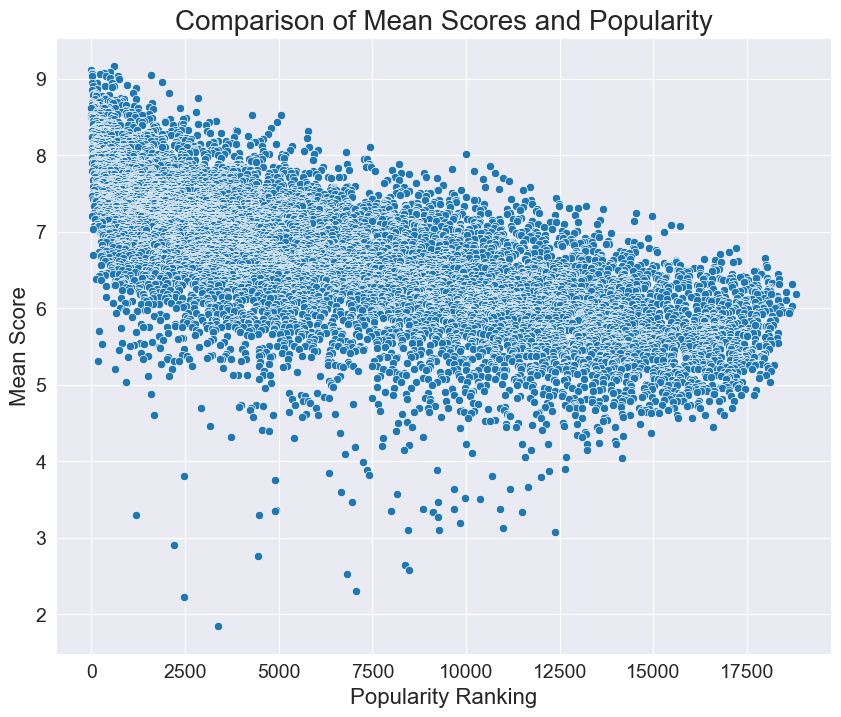

In [23]:
df_popularity = pd.read_csv('anime_details_cleaned.csv')
# Create a scatter plot with mean score on x-axis and popularity on y-axis
plt.figure(figsize=(10, 8))
sb.scatterplot(y='mean', x='popularity', data=df_genres)
plt.title('Comparison of Mean Scores and Popularity', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Mean Score', fontsize=16)
plt.xlabel('Popularity Ranking', fontsize=16)

plt.show()


# Analysis
* There seems to be a slight negative correlation with the popularity ranking with mean score.
* Thus, those anime with a bad ranking will tend to have a lower mean score.

# 4. NSFW VS Mean

Text(0, 0.5, 'NSFW Type')

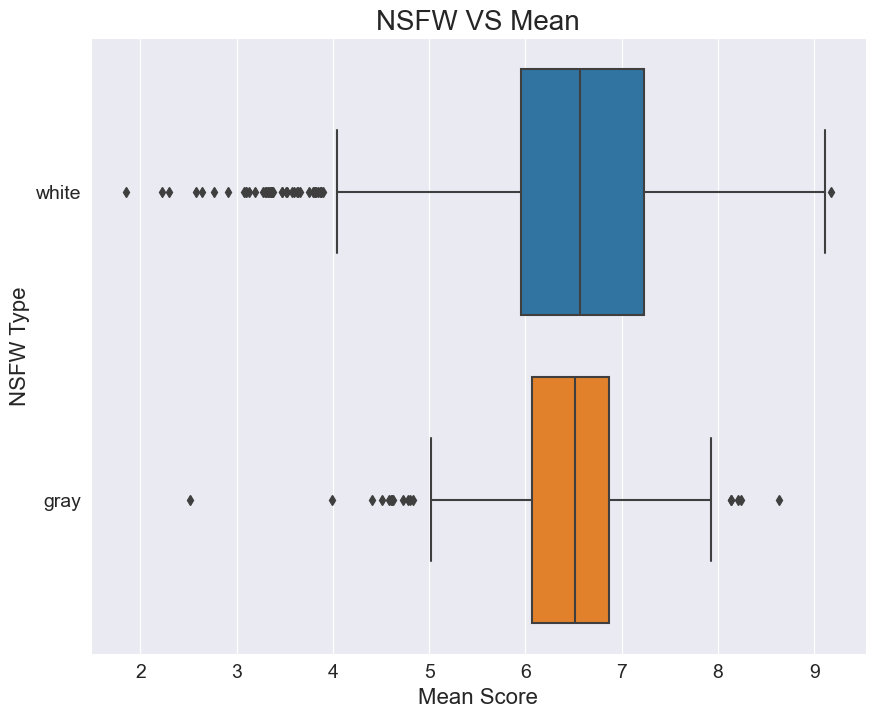

In [24]:
df_nsfw = pd.read_csv('anime_details_cleaned.csv')

# Create a scatter plot with mean score on x-axis and popularity on y-axis
plt.figure(figsize=(10, 8))
sb.boxplot(x='mean', y='nsfw', data=df_nsfw)
plt.title('NSFW VS Mean', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Mean Score', fontsize=16)
plt.ylabel('NSFW Type', fontsize=16)

# Analysis
* Those anime which is labelled white (Non-NSFW) has a higher mean score in general compared to anime labelled gray (NSFW). 

# 5. Media Type VS Mean

Text(0, 0.5, 'Media Type')

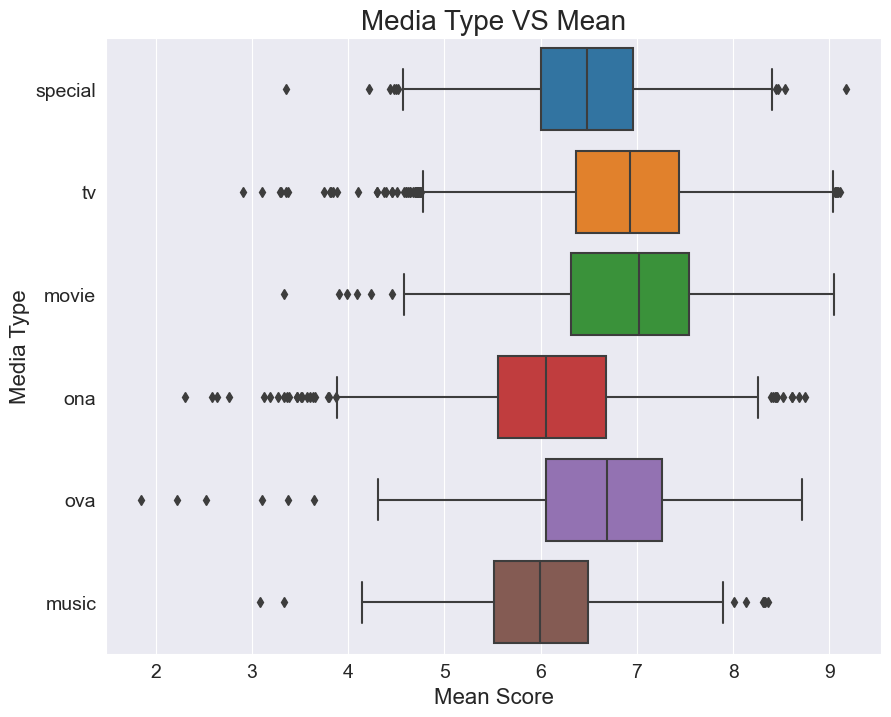

In [25]:
df_media = pd.read_csv('anime_details_cleaned.csv')

# Create a scatter plot with mean score on x-axis and popularity on y-axis
plt.figure(figsize=(10, 8))
sb.boxplot(x='mean', y='media_type', data=df_media)
plt.title('Media Type VS Mean', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Mean Score', fontsize=16)
plt.ylabel('Media Type', fontsize=16)

# Analysis
* Media type movie has the highest mean followed by TV and OVA

# 6. Source Type VS Mean

Text(0, 0.5, 'Source Type')

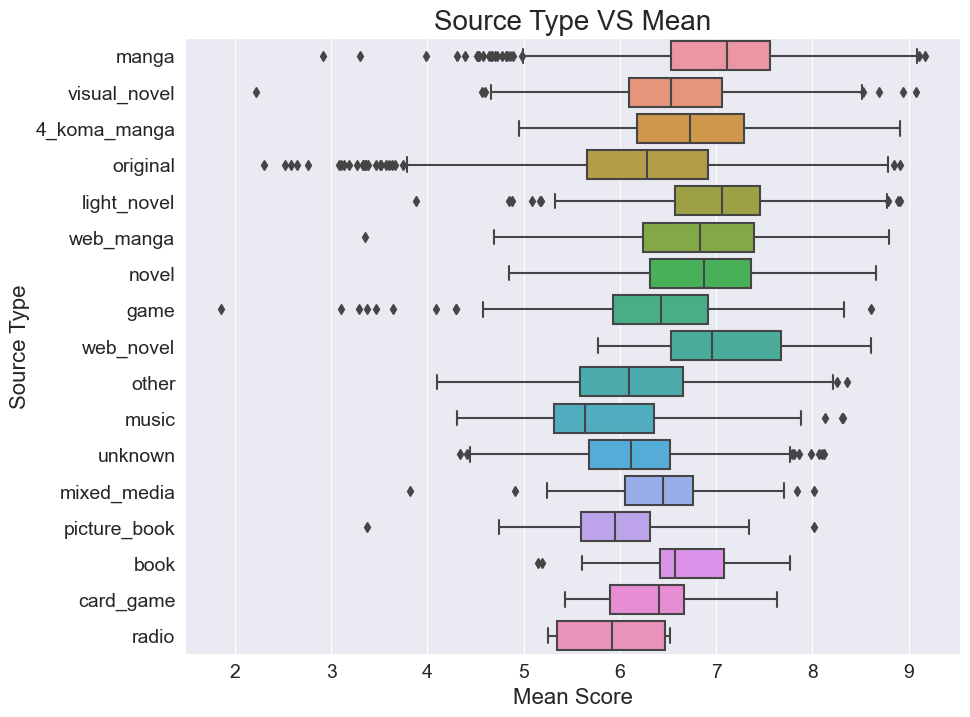

In [26]:
df_source_mean = pd.read_csv('anime_details_cleaned.csv')
df_source_mean = df_source_mean[['mean','source']]
df_source_mean = df_source_mean.dropna()
f = plt.figure(figsize=(10, 8 ))
sb.boxplot(x = 'mean', y = 'source',data = df_source_mean)
plt.title('Source Type VS Mean', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Mean Score', fontsize=16)
plt.ylabel('Source Type', fontsize=16)

# Analysis
* Anime produced from source light novel produces the highest rated manga on average, folllowed by manga and web novel

Text(0, 0.5, 'Rating Type')

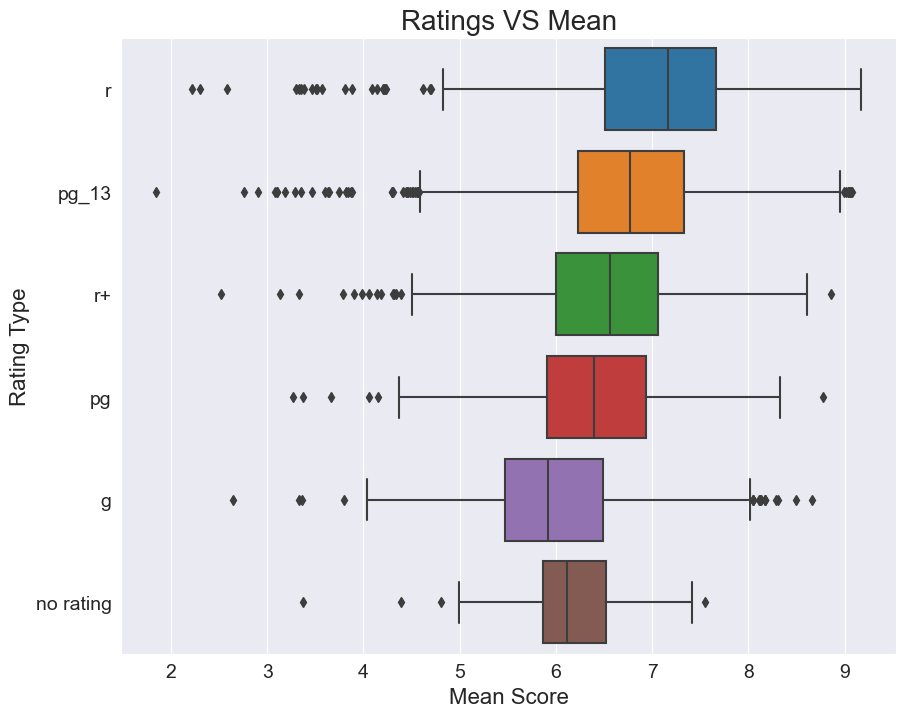

In [27]:
df_ratings = pd.read_csv('anime_details_cleaned.csv')
f = plt.figure(figsize=(10, 8 ))
sb.boxplot(x = 'mean', y = 'rating',data = df_ratings)
plt.title('Ratings VS Mean', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Mean Score', fontsize=16)
plt.ylabel('Rating Type', fontsize=16)

# Analysis
* R rated animes have the highest average score followed by PG13

# 7. Season VS Mean

Text(0, 0.5, 'Season')

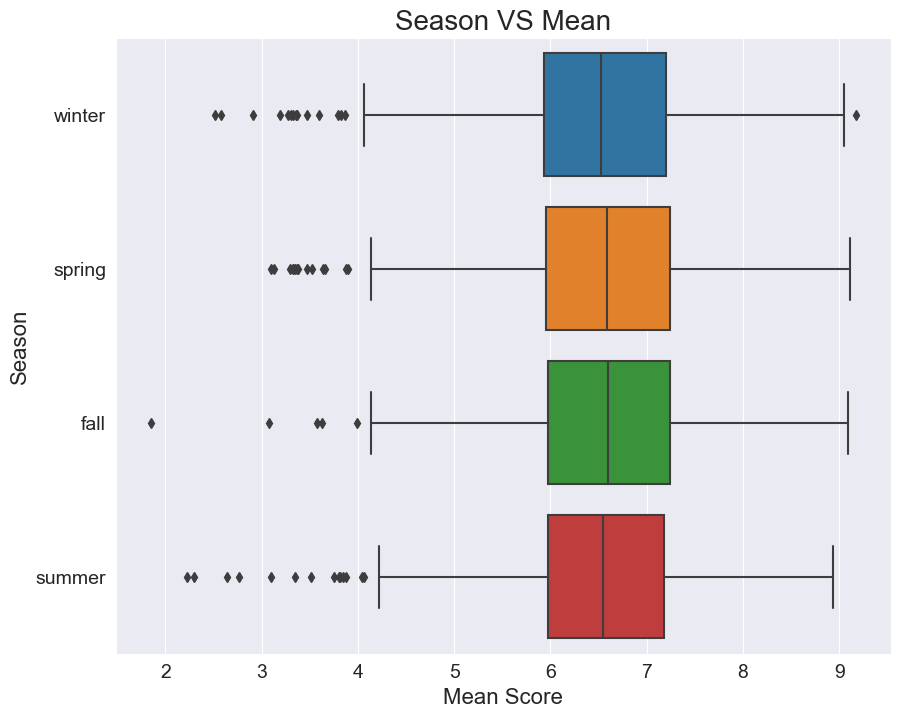

In [28]:
df_season = pd.read_csv('anime_details_cleaned.csv')

# Create a scatter plot with mean score on x-axis and popularity on y-axis
plt.figure(figsize=(10, 8))
sb.boxplot(x='mean', y='start_season.season', data=df_season)
plt.title('Season VS Mean', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Mean Score', fontsize=16)
plt.ylabel('Season', fontsize=16)

# Analysis
* Animes released in the season of fall has the highest mean score compared to the rest of the seasons.

# 8. Year VS Mean

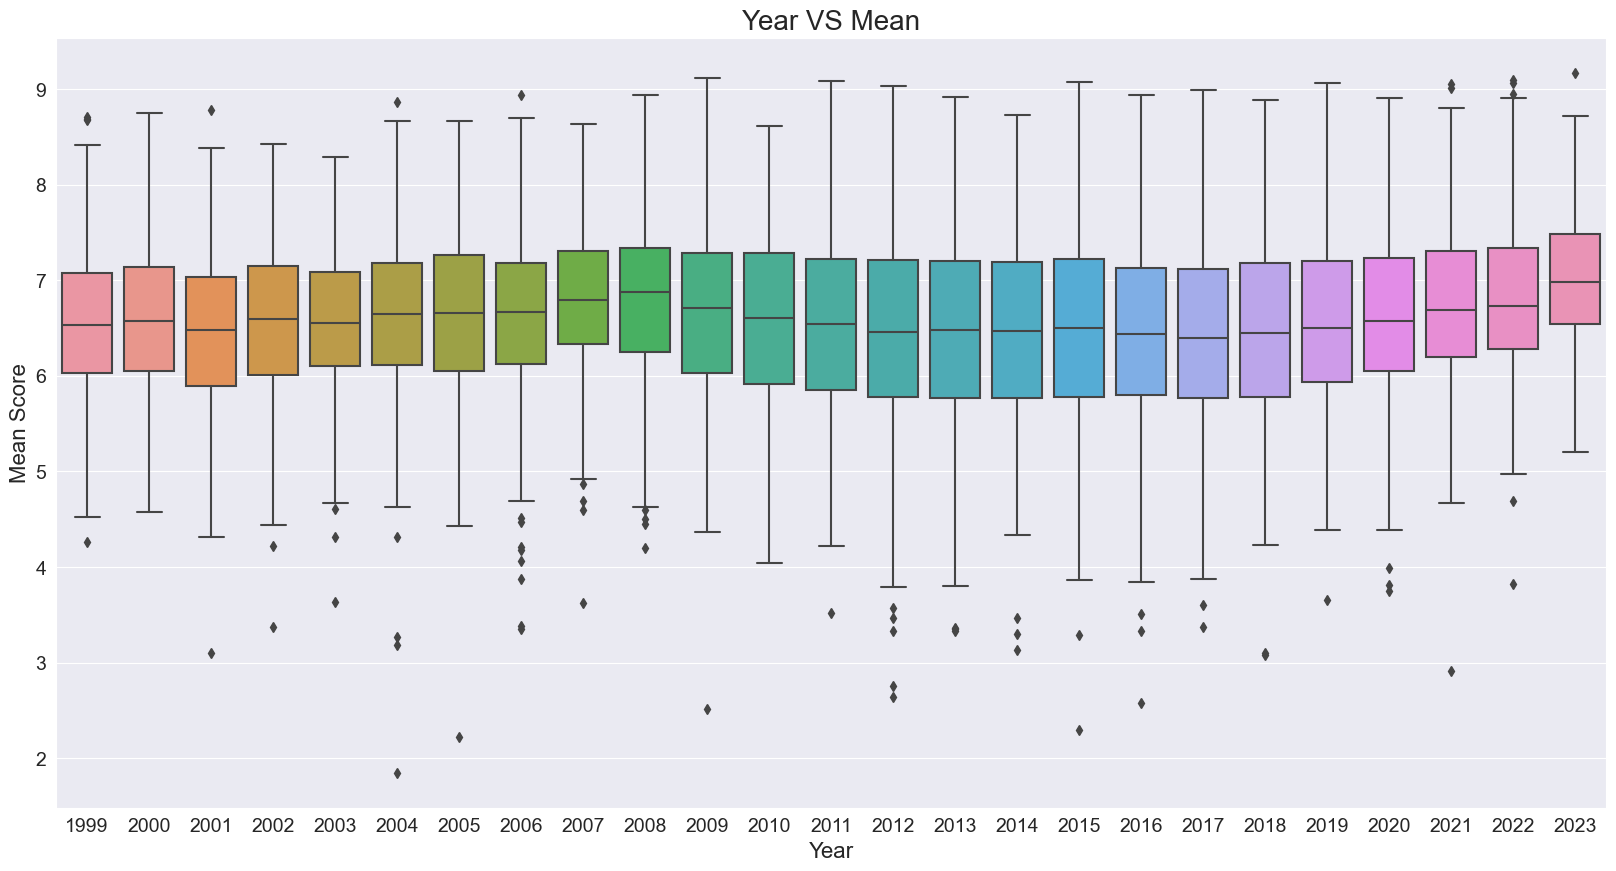

In [29]:
from matplotlib.ticker import FormatStrFormatter

df_year = pd.read_csv('anime_details_cleaned.csv')
df_year['start_season.year'] = df_year['start_season.year'].astype(int)

# Create a scatter plot with mean score on x-axis and popularity on y-axis
plt.figure(figsize=(20, 10))
sb.boxplot(y='mean', x='start_season.year', data=df_year)
plt.title('Year VS Mean', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Score', fontsize=16)

plt.show()

# Analysis
* Not accounting for 2023 as the year just started, animes produced and released in the year 2007 has the highest mean score. 